In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [2]:
df_raw = pd.read_csv('kredit.csv')

In [3]:
df = df_raw.copy(deep=True)

## Bereinigung der Daten

In [4]:
# Prüfen, ob die Tabelle einen Nullwert enthält

df.isnull().sum()

kredit      0
laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
dtype: int64

In [5]:
# Prüfen, ob duplizierte Daten in der Tabelle vorhanden sind

df.duplicated().value_counts()

False    1000
dtype: int64

### Zusammenfassung (1)

#### Es gibt keine "missing value" und duplizierte Daten in der Tabelle vorhanden

## Explorative Datenanalyse

In [6]:
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [7]:
# Liste aller Spalten

df.columns

Index(['kredit', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb'],
      dtype='object')

In [8]:
# Beschreibung der DataFrame

df.describe()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [9]:
def summary_df(df):

  columns = df.columns.to_list()

  dtypes = []
  unique_counts = []
  missing_counts = []
  missing_percentages = []
  total_counts = [df.shape[0]] * len(columns)

  for column in columns:
      dtype = str(df[column].dtype)
      dtypes.append(dtype)
        
      unique_count = df[column].nunique()
      unique_counts.append(unique_count)

      missing_count = df[column].isnull().sum()
      missing_counts.append(missing_count)
        
      missing_percentage = round((missing_count/df.shape[0]) * 100, 2)
      missing_percentages.append(missing_percentage)
        
  df_summary = pd.DataFrame({
      "column": columns,
      "dtype": dtypes,
      "unique_count": unique_counts,
      "missing_count": missing_counts,
      "missing_percentage": missing_percentages,
      "total_count": total_counts,
  })
    
  df_summary = df_summary.sort_values(by="missing_percentage", ascending=False).reset_index(drop=True)
    
  return df_summary

In [10]:
summary_df(df)

,column,dtype,unique_count,missing_count,missing_percentage,total_count
0,kredit,int64,2,0,0.0,1000
1,wohnzeit,int64,4,0,0.0,1000
2,telef,int64,2,0,0.0,1000
3,pers,int64,2,0,0.0,1000
4,beruf,int64,4,0,0.0,1000
5,bishkred,int64,4,0,0.0,1000
6,wohn,int64,3,0,0.0,1000
7,weitkred,int64,3,0,0.0,1000
8,alter,int64,53,0,0.0,1000
9,verm,int64,4,0,0.0,1000


In [11]:
df['kredit'].nunique()

2

In [12]:
# die Anzahl der abhängigen Variablen berechnen

df['kredit'].value_counts()

1    700
0    300
Name: kredit, dtype: int64

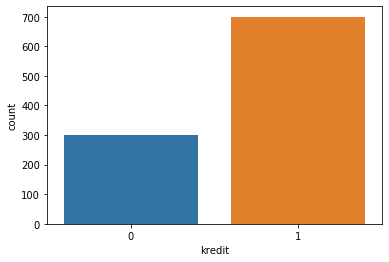

In [13]:
sns.countplot(df['kredit'])

### Zusammenfassung (2)
#### - Der Datensatz ist ungleichmäßig (Im Vergleich zu Klasse 0 ist die Zahl der Klasse 1 um 400 höher). Diese Daten selbst sind vielleicht eine Stichprobe aus größeren Daten.
#### - Wie wir sehen können, haben unsere Daten keinen anderen Typ als int64, die fast alle numerisch sind, und für kategorisch wird auch mit Zahlen dargestellt.
#### - Echter kontinuierlicher Wert sind in 'alter', 'hoehe', 'laufzeit' Spalten befinden

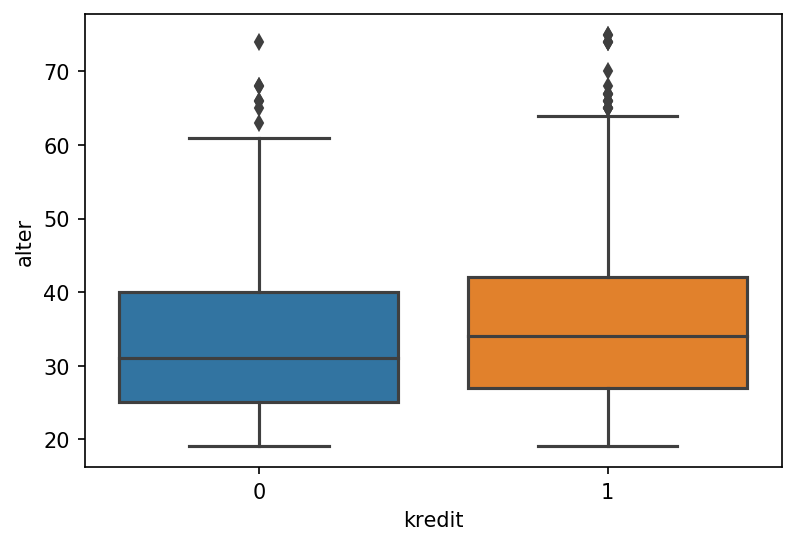

In [14]:
# Distribution features per category

plt.figure(dpi=150)
sns.boxplot(x='kredit', y='alter', data=df)

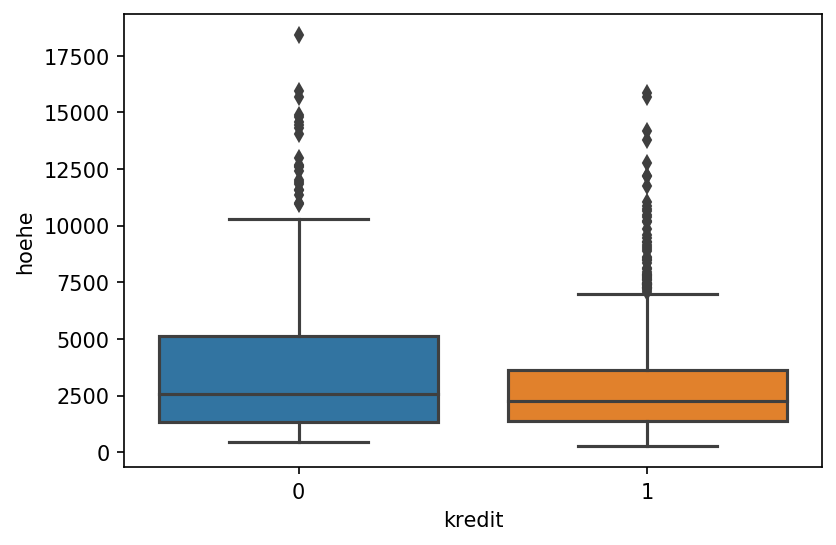

In [15]:
plt.figure(dpi=150)
sns.boxplot(x='kredit', y='hoehe', data=df)

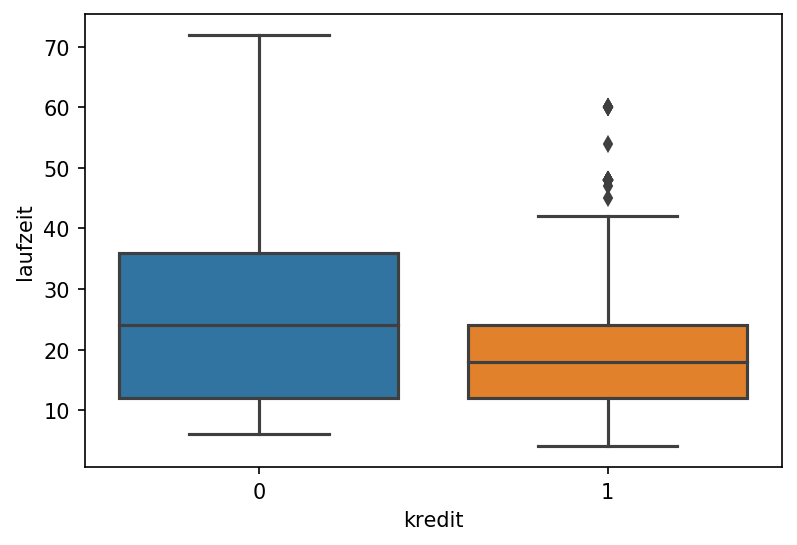

In [16]:
plt.figure(dpi=150)
sns.boxplot(x='kredit', y='laufzeit', data=df)

In [17]:
#################################################################################################

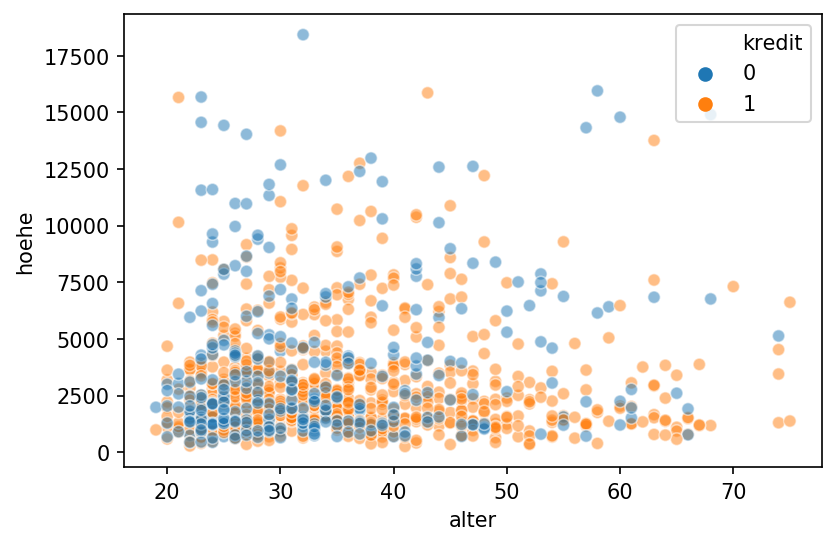

In [18]:
plt.figure(dpi=150)
sns.scatterplot(x='alter', y='hoehe', data=df, hue='kredit', alpha=0.5)

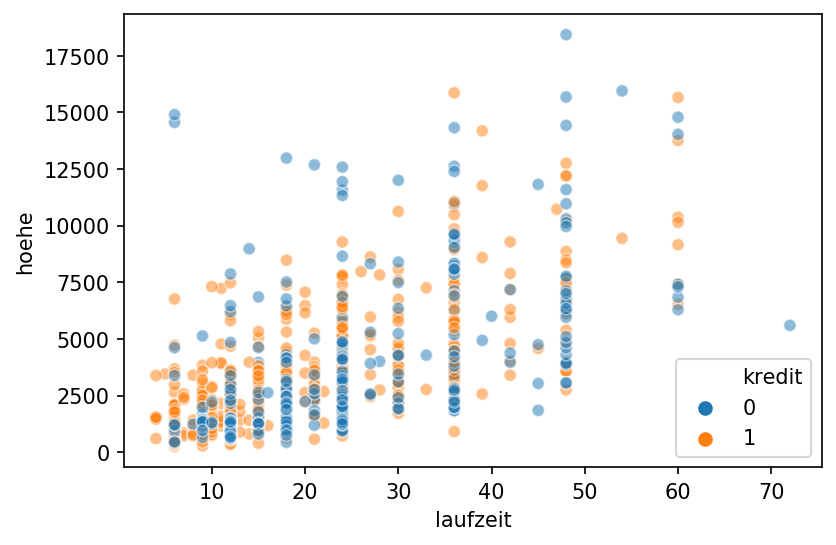

In [19]:
plt.figure(dpi=150)
sns.scatterplot(x='laufzeit', y='hoehe', data=df, hue='kredit', alpha=0.5)

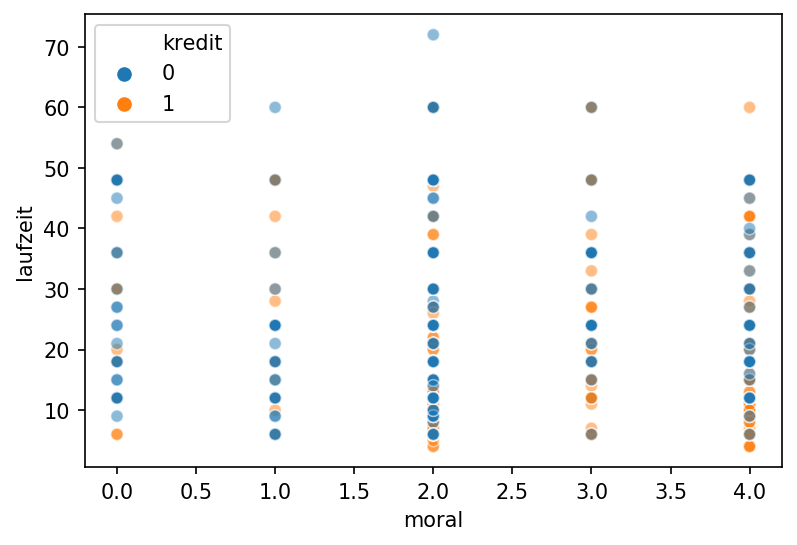

In [5]:
plt.figure(dpi=150)
sns.scatterplot(x='moral', y='laufzeit', data=df, hue='kredit', alpha=0.5)

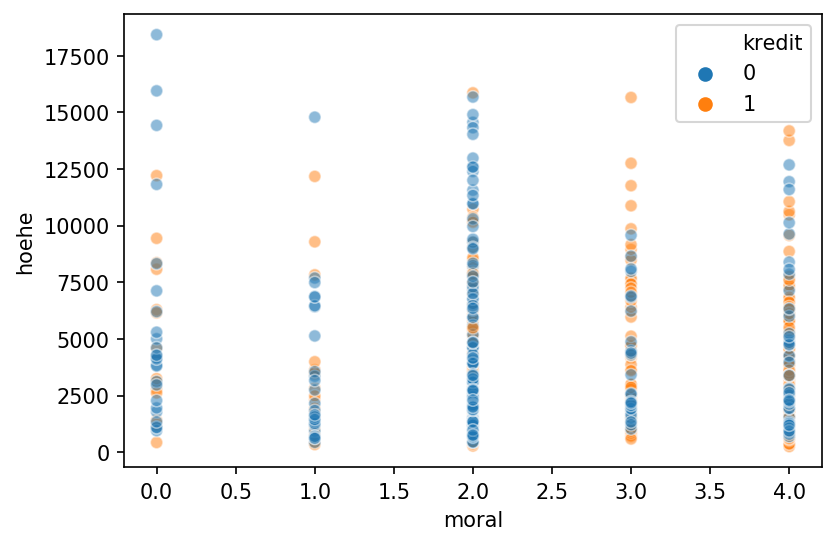

In [6]:
plt.figure(dpi=150)
sns.scatterplot(x='moral', y='hoehe', data=df, hue='kredit', alpha=0.5)

<Figure size 900x600 with 0 Axes>

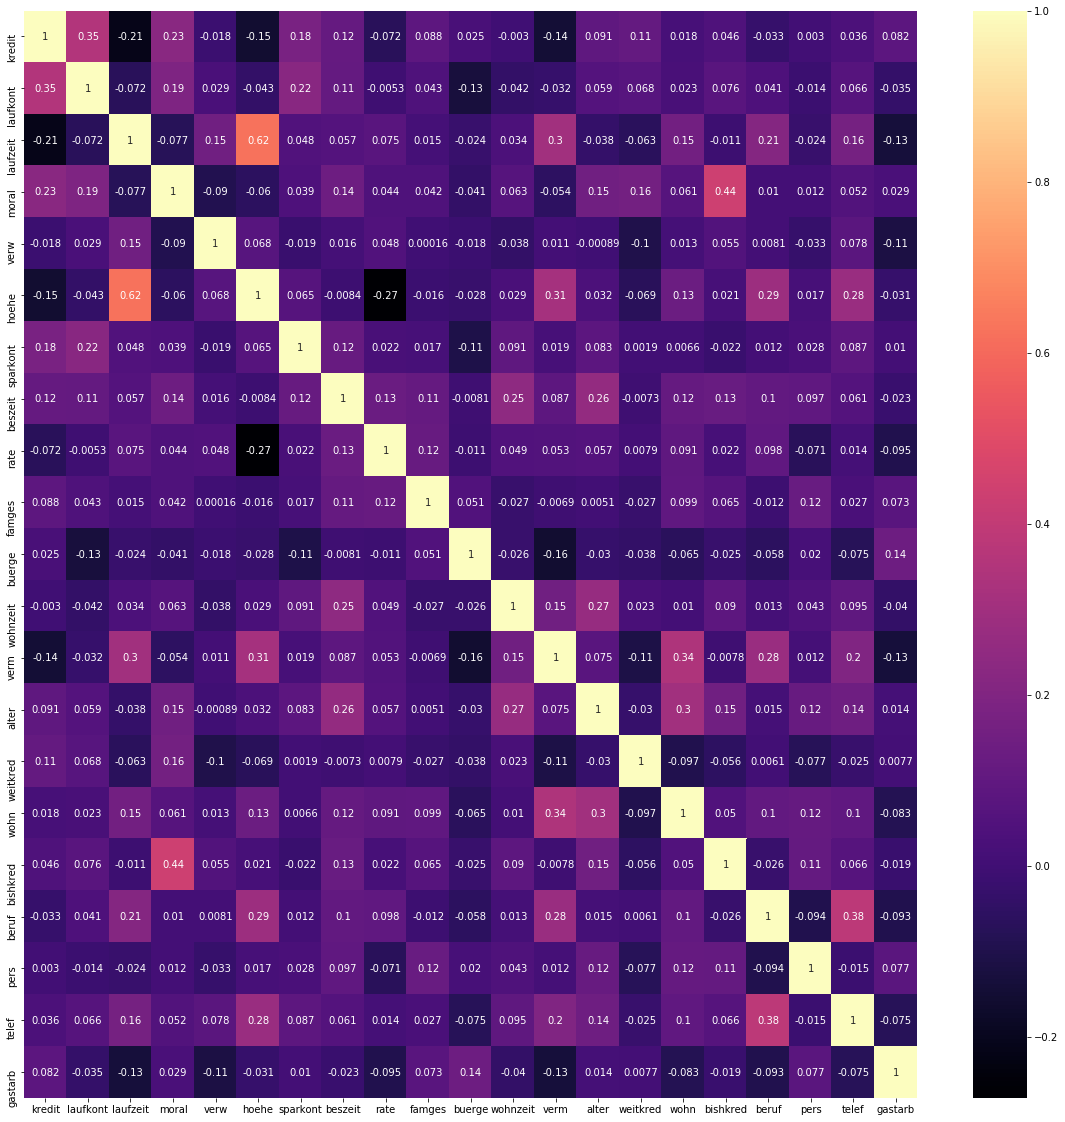

In [20]:
plt.figure(dpi=150)
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='magma',annot=True)

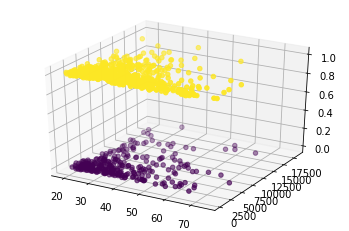

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['alter'], df['hoehe'], df['kredit'],c=df['kredit'])

### Hoehe

...<=500................	10	
500 < ... <= 1000	9	
1000 < ... <= 1500	8	
1500 < ... <= 2500	7	
2500 < ... <= 5000	6	
5000 < ... <= 7500	5	
7500 < ... <= 10000	4	
10000 < ... <= 15000 3 	
15000 < ... <= 20000 2	
...> 20000.........	1

In [22]:
df['hoehe'].describe()

count     1000.00000
mean      3271.24800
std       2822.75176
min        250.00000
25%       1365.50000
50%       2319.50000
75%       3972.25000
max      18424.00000
Name: hoehe, dtype: float64

### Laufkont (bestehendes lfd. Konto bei der Bank)
kein Kontostand bzw. Debetsaldo -> 2	
0 <= ... < 200 DM -> 3	
... >= 200 DM oder Gehaltskonto seit mind. 1 Jahr -> 4	
kein lfd. Konto -> 1

In [23]:
df['laufkont'].nunique()

4

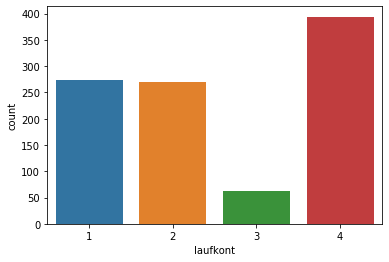

In [160]:
sns.countplot(df['laufkont'])

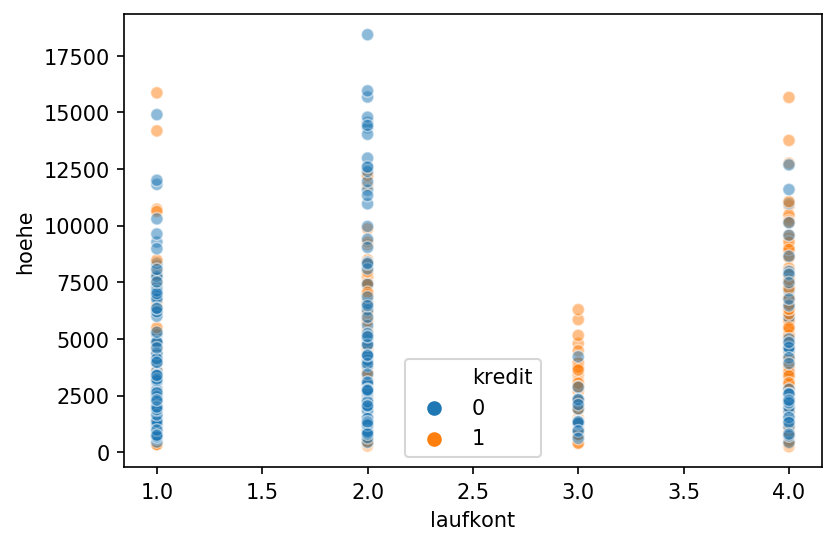

In [161]:
plt.figure(dpi=150)
sns.scatterplot(x='laufkont', y='hoehe', data=df, hue='kredit', alpha=0.5)

### Sparkont (Sparkonto oder Wertpapiere)
< 100,- DM .........................................2

100,- <= ... < 500,- DM .......................3

500,- <= ... < 1000,- DM .....................4

.>= 1000,- DM ....................................5

.nicht ermittelbar / kein Sparkonto .....1

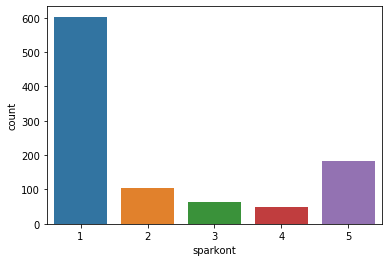

In [162]:
sns.countplot(df['sparkont'])

In [ ]:
!pip install jupyter_contrib_nbextensions

### Grouping by analysis

#### Alter
 0 <= ... <= 25	: 1
 
 26 <= ... <= 39	: 2
 
 40 <= ... <= 59	: 3
 
 60 <= ... <= 64	: 5
 
 .>= 65	: 4

In [5]:
df['altersgruppe'] = np.nan

lst = [df]

for col in lst:
    col.loc[(col['alter'] > 18) & (col['alter'] <= 25), 'altersgruppe'] = 'Young Adults'
    col.loc[(col['alter'] > 25) & (col['alter'] <= 39), 'altersgruppe'] = 'Adults'
    col.loc[(col['alter'] > 39) & (col['alter'] <= 59), 'altersgruppe'] = 'Senior'
    col.loc[col['alter'] > 59, 'altersgruppe'] = 'Elder' 
    
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,1,1,1,Young Adults
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,2,1,1,Adults
2,1,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,1,1,1,Young Adults
3,1,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,2,1,2,Adults
4,1,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,1,1,2,Adults


In [26]:
df['altersgruppe'].value_counts()

Adults          511
Senior          248
Young Adults    190
Elder            51
Name: altersgruppe, dtype: int64

In [27]:
df.groupby(['altersgruppe','kredit'])['hoehe'].sum()

altersgruppe  kredit
Adults        0          545177
              1         1153605
Elder         0           63355
              1          105805
Senior        0          298040
              1          534619
Young Adults  0          274866
              1          295781
Name: hoehe, dtype: int64

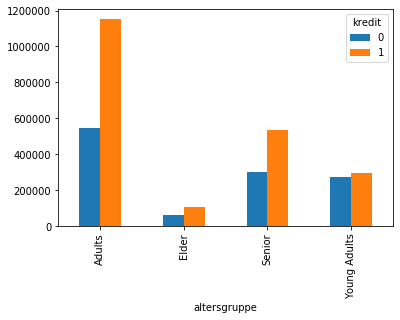

In [28]:
df.groupby(['altersgruppe','kredit'])['hoehe'].sum().unstack().plot(kind='bar')

#### + Die Summe der Kredite an 'Young Adult' in Kreditkategorie 1 und Kredit 0 ist fast gleich
#### + bei  'Adults', dass das Kreditvolumen bei Darlehen der Kategorie 1 fast 2-mal so hoch ist wie bei Darlehen der Kategorie 0

In [29]:
df.groupby(['altersgruppe','kredit'])['hoehe'].count()

altersgruppe  kredit
Adults        0         142
              1         369
Elder         0          13
              1          38
Senior        0          65
              1         183
Young Adults  0          80
              1         110
Name: hoehe, dtype: int64

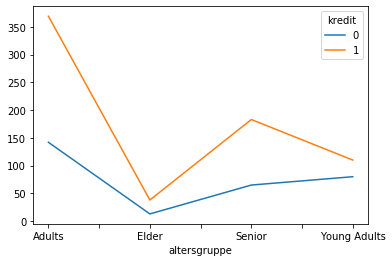

In [30]:
df.groupby(['altersgruppe','kredit'])['hoehe'].count().unstack().plot()

#### + die Alterskategorie, für die die meisten Kredite gemacht werden, ist die Kategorie der 'Young Adult'

#### in der Spalte 'verw' gab es keine Personen, die Kredite für die Kategorie 7 (Ausbildung) vergaben.

In [31]:
# Verwendung zur Ausbildung

df[df['verw'] == 7]

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe


In [32]:
# Verwendung zum Betrieb

df[(df['verw'] == 10) & (df['altersgruppe'] == 'Young Adults')]

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,altersgruppe


In [33]:
df.groupby(['altersgruppe','verw'])['verw'].count()

altersgruppe  verw
Adults        0       124
              1        53
              2        85
              3       141
              4         5
              5         7
              6        20
              8         6
              9        64
              10        6
Elder         0        16
              1         7
              2         2
              3        11
              4         1
              5         3
              6         4
              9         6
              10        1
Senior        0        62
              1        29
              2        42
              3        64
              4         2
              5         6
              6        19
              8         2
              9        17
              10        5
Young Adults  0        32
              1        14
              2        52
              3        64
              4         4
              5         6
              6         7
              8         1
              9    

<Figure size 60000x40000 with 0 Axes>

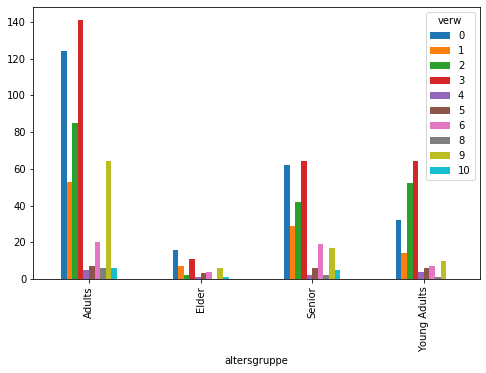

In [43]:

alt_verw_gr = df.groupby(['altersgruppe','verw'])['verw'].count().unstack()
plt.figure(dpi=10000)
alt_verw_gr.plot.bar(figsize=(8,5))
#plt.text(1, 130, 'boxed italics text in data coords',
#        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
plt.show()


#### + Bei jungen Erwachsenen gibt es keine Bedarf, Kredite an Kategorie 10 (Betrieb) zu vergeben.
#### + Der Zweck des Kredits für die Kategorie 3 (Einrichtungsgegenstände/Möbel) ist für Erwachsene, jungen Erwachsenen und Senioren insgesamt am höchsten aber bei Ältere ist die Kategorie 0 (Sonstiges)
#### + in der Spalte 'verw' gab es keine Personen, die Kredite für die Kategorie 7 (Ausbildung) vergaben, trotzdem verwenden einige immer noch Kredite für Kategorie 9 (Umschulung)

In [173]:
df.groupby(['altersgruppe','beruf'])['hoehe'].sum()

altersgruppe  beruf
Adults        1          11504
              2         224834
              3        1010408
              4         452036
Elder         1           8446
              2          21155
              3          58119
              4          81440
Senior        1          10833
              2         128981
              3         451969
              4         240876
Young Adults  1          29610
              2          96716
              3         414220
              4          30101
Name: hoehe, dtype: int64

<Figure size 1200x800 with 0 Axes>

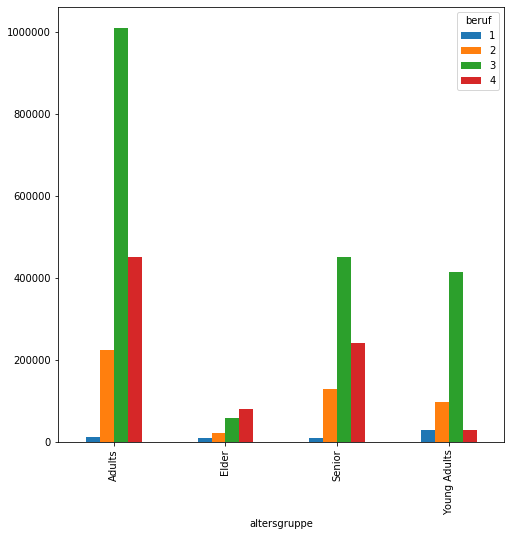

In [174]:
alt_beruf_gr = df.groupby(['altersgruppe','beruf'])['hoehe'].sum().unstack()
plt.figure(dpi=200)
alt_beruf_gr.plot.bar(figsize=(8,8))
plt.show()


#### ? Da niemand den Kredit für die Kategorie 7 (Ausbildung) verwendet, überprüfen wir die Kategorie 9 (Umschulung). In diesem Fall bedeutet dies, dass die Person etwas gelernt hat oder über bestimmte Kenntnisse verfügt. Schauen wir uns ihre Arbeitsart an.

<Figure size 60000x40000 with 0 Axes>

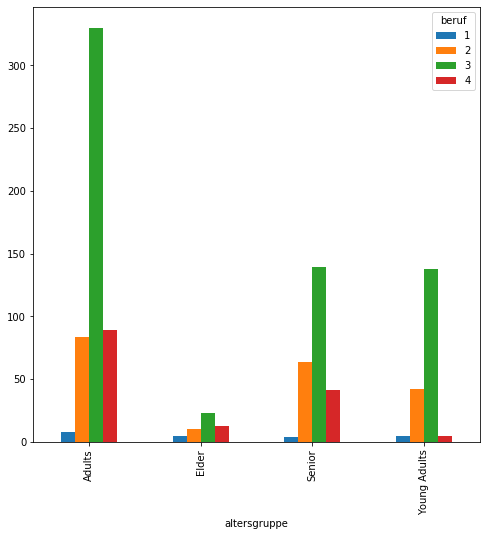

In [44]:
alt_beruf_gr = df.groupby(['altersgruppe','beruf'])['beruf'].count().unstack()
plt.figure(dpi=10000)
alt_beruf_gr.plot.bar(figsize=(8,8))
plt.show()


In [176]:
df.groupby(['altersgruppe','beruf'])['beruf'].count()

altersgruppe  beruf
Adults        1          8
              2         84
              3        330
              4         89
Elder         1          5
              2         10
              3         23
              4         13
Senior        1          4
              2         64
              3        139
              4         41
Young Adults  1          5
              2         42
              3        138
              4          5
Name: beruf, dtype: int64

In [45]:
# verw 9 beruf?

#df[df['verw'] == 9]['beruf'].count()

df.groupby(['verw','beruf'])['beruf'].count()

verw  beruf
0     1         11
      2         59
      3        130
      4         34
1     1          1
      2          7
      3         60
      4         35
2     1          1
      2         33
      3        126
      4         21
3     1          2
      2         57
      3        195
      4         26
4     1          1
      2          1
      3         10
5     1          2
      2          7
      3         13
6     1          1
      2         10
      3         32
      4          7
8     2          5
      3          3
      4          1
9     1          2
      2         20
      3         60
      4         15
10    1          1
      2          1
      3          1
      4          9
Name: beruf, dtype: int64

In [46]:
df[df['verw'] == 9]['beruf'].count()

97

<Figure size 6000x4000 with 0 Axes>

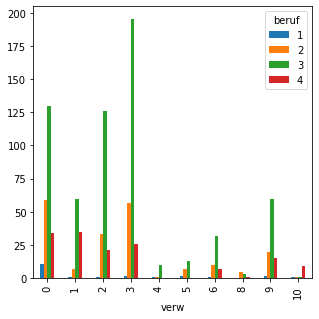

In [7]:
alt_beruf_gr = df.groupby(['verw','beruf'])['beruf'].count().unstack()
plt.figure(dpi=1000)
alt_beruf_gr.plot.bar(figsize=(5,5))
plt.show()


#### + Die Art von Arbeit, bei der die meisten Kredite für Kategorie 9 (Umschulung) verwendet werden, ist Kategorie 3 (Facharbeiter / gelernte Angestellte / Beamte)

In [178]:
df.groupby(['altersgruppe','beruf','kredit'])['beruf'].count()

altersgruppe  beruf  kredit
Adults        1      0           4
                     1           4
              2      0          23
                     1          61
              3      0          89
                     1         241
              4      0          26
                     1          63
Elder         1      1           5
              2      0           3
                     1           7
              3      0           5
                     1          18
              4      0           5
                     1           8
Senior        1      0           1
                     1           3
              2      0          12
                     1          52
              3      0          35
                     1         104
              4      0          17
                     1          24
Young Adults  1      0           2
                     1           3
              2      0          18
                     1          24
              3      0     

<Figure size 6000x4000 with 0 Axes>

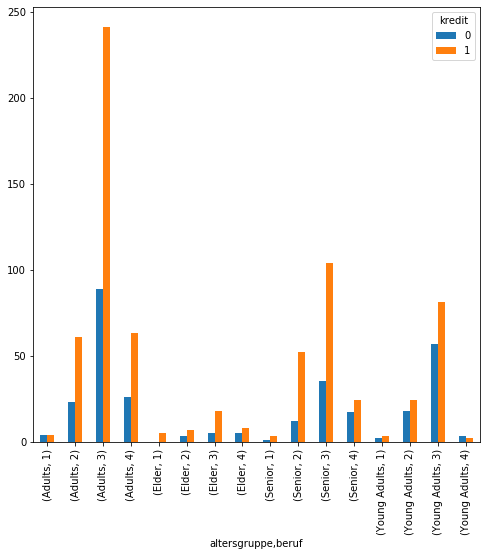

In [9]:
alt_beruf_gr = df.groupby(['altersgruppe','beruf','kredit'])['beruf'].count().unstack()
plt.figure(dpi=1000)
alt_beruf_gr.plot.bar(figsize=(8,8))
plt.show()


In [22]:


df[(df['beruf']==1) & (df['kredit']==0)].shape[0]

7

In [23]:
df[(df['beruf']==1)].shape[0]

22

In [24]:
df[(df['beruf']==1) & (df['kredit']==1)].shape[0]

15

#### + Anzahl der Personen, die selbstandig arbeiten und die Kredit nicht rückzahlen können, betrag 51

#### + die Art der Arbeit, für die am häufigsten Kredite vergeben werden, ist eine Kategorie 3 (Facharbeiter / gelernte Angestellte / Beamte)

#### + Es zeigt sich, dass für junge Erwachsene mit Berufskategorie 4 (Führungskraft / selbständig / gehobener Beamter) mehr Personen keinen Kredit bezahlen können als Personen, die einen Kredit bezahlen können.

In [180]:
df['beruf'].value_counts()

3    630
2    200
4    148
1     22
Name: beruf, dtype: int64

In [181]:
df.pivot_table(['beruf','verw'],['altersgruppe'],aggfunc='sum')

,beruf,verw
altersgruppe,,
Adults,1522,1505
Elder,146,151
Senior,713,676
Young Adults,523,496


#### ? Vergleichen wir nun das Alter mit dem Familienstand

In [182]:
df['famges'].value_counts()

3    548
2    310
4     92
1     50
Name: famges, dtype: int64

In [183]:
df.groupby(['altersgruppe','famges'])['famges'].count()

altersgruppe  famges
Adults        1          27
              2         136
              3         299
              4          49
Elder         1           4
              2          12
              3          34
              4           1
Senior        1          17
              2          57
              3         159
              4          15
Young Adults  1           2
              2         105
              3          56
              4          27
Name: famges, dtype: int64

<Figure size 1200x800 with 0 Axes>

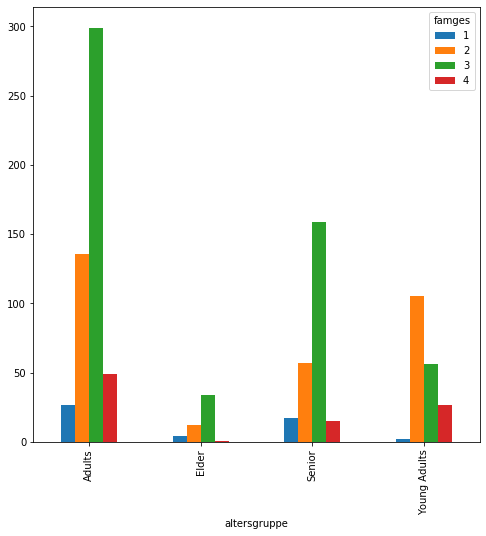

In [184]:
alt_famges_gr = df.groupby(['altersgruppe','famges'])['famges'].count().unstack()
plt.figure(dpi=200)
alt_famges_gr.plot.bar(figsize=(8,8))
plt.show()


#### Die meisten Kredite werden in fast allen Altersgruppen von "famges" der Kategorie 3 (männlich: verheiratet / verwitwet) vergeben, mit Ausnahme junger Erwachsener, bei denen die Kategorie 2 (weiblich: geschieden / getrennt lebend / verheiratet oder männlich: ledig) dominiert.

In [185]:
df.groupby(['altersgruppe','famges','kredit'])['famges'].count()

altersgruppe  famges  kredit
Adults        1       0          13
                      1          14
              2       0          49
                      1          87
              3       0          70
                      1         229
              4       0          10
                      1          39
Elder         1       0           1
                      1           3
              2       0           2
                      1          10
              3       0           9
                      1          25
              4       0           1
Senior        1       0           6
                      1          11
              2       0          11
                      1          46
              3       0          45
                      1         114
              4       0           3
                      1          12
Young Adults  1       1           2
              2       0          47
                      1          58
              3       0          22

<Figure size 1200x800 with 0 Axes>

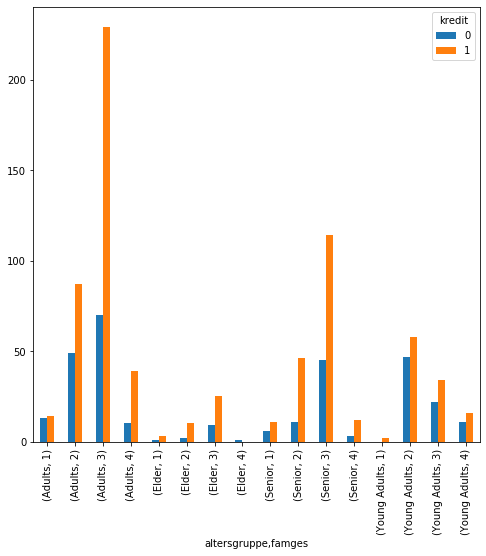

In [188]:
alt_famges_gr = df.groupby(['altersgruppe','famges','kredit'])['famges'].count().unstack()
plt.figure(dpi=200)
alt_famges_gr.plot.bar(figsize=(8,8))
plt.show()


Text(0.5, 1.0, 'welche Kategorien geben die Young Adults am häufigsten aus?')

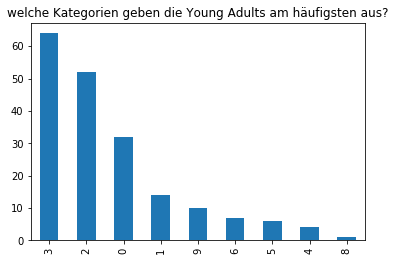

In [189]:
# welche Kategorien geben die Young Adults am häufigsten aus?

df[(df['altersgruppe'] == 'Young Adults')]['verw'].value_counts().plot(kind='bar')
plt.title('welche Kategorien geben die Young Adults am häufigsten aus?')

In [190]:
df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2) & (df['beruf'] == 3)]['verw'].value_counts()

2    26
3    22
0    12
6     6
4     4
1     4
5     2
9     1
Name: verw, dtype: int64

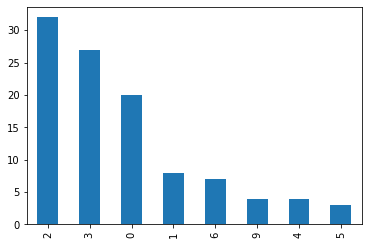

In [25]:
# welche Kategorien geben die Young Adults mit famges 2 am häufigsten aus?

df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)]['verw'].value_counts().plot(kind='bar')
#plt.title('welche Kategorien geben die Young Adults mit famges 2 am häufigsten aus?')

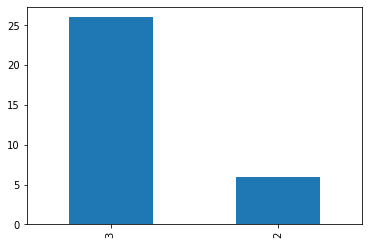

In [26]:
# YA, famges 2, verw 2, beruf?

df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2) & (df['verw'] == 2)]['beruf'].value_counts().plot(kind='bar')
#plt.title('welche Beruf hat die Young Adults mit famges 2 und Verwendungszweck 2 am häufigsten?')

#### + Zwar nehmen junge Erwachsene generell Kredite für Bedürfnisse der Kategorie 3 (Einrichtungsgegenstände / Möbel) auf, aber junge Erwachsene mit 'famges' 2 nehmen Kredite für Zwecke der Kategorie 2 (PKW gebraucht)

#### + Es stellt sich heraus, dass die Arbeitsplätze junger Erwachsener mit Familiestand Kategori 2 eher als 3 (Facharbeiter / gelernte Angestellte / Beamte) arbeiten, obwohl es auch diejenigen gibt, die nicht arbeiten, die ebenfalls einen Kredit für Gebrauchtwagen auch aufnehmen

In [193]:
df.groupby(['altersgruppe','famges','beruf'])['famges'].count()

altersgruppe  famges  beruf
Adults        1       2          3
                      3         20
                      4          4
              2       1          6
                      2         20
                      3         91
                      4         19
              3       1          1
                      2         53
                      3        185
                      4         60
              4       1          1
                      2          8
                      3         34
                      4          6
Elder         1       2          2
                      3          1
                      4          1
              2       1          1
                      2          1
                      3          6
                      4          4
              3       1          4
                      2          7
                      3         15
                      4          8
              4       3          1
Senior        1       2    

<Figure size 1200x800 with 0 Axes>

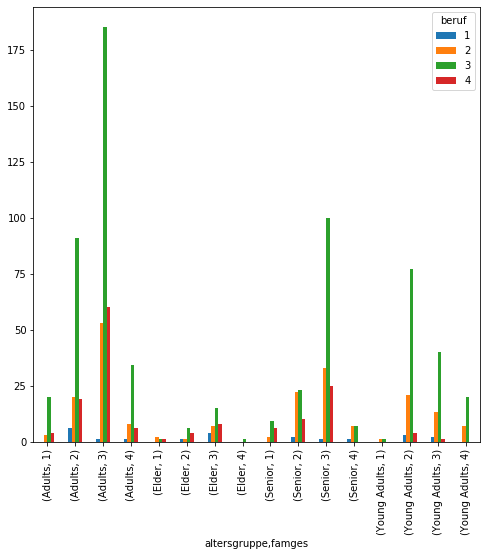

In [194]:
alt_famges_ber = df.groupby(['altersgruppe','famges','beruf'])['famges'].count().unstack()
plt.figure(dpi=200)
alt_famges_ber.plot.bar(figsize=(8,8))
plt.show()

#### ? jetzt sehen wir die Zahl der Abhängigen Person

In [195]:
df['pers'].value_counts()

1    845
2    155
Name: pers, dtype: int64

In [196]:
df.groupby(['altersgruppe','pers'])['pers'].count()

altersgruppe  pers
Adults        1       430
              2        81
Elder         1        48
              2         3
Senior        1       183
              2        65
Young Adults  1       184
              2         6
Name: pers, dtype: int64

<Figure size 1200x800 with 0 Axes>

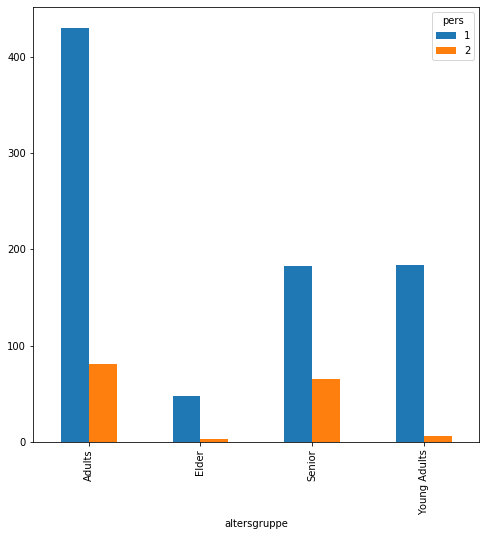

In [197]:
alt_famges_pers = df.groupby(['altersgruppe','pers'])['pers'].count().unstack()
plt.figure(dpi=200)
alt_famges_pers.plot.bar(figsize=(8,8))
plt.show()

#### + die Anzahl der unterhaltsberechtigten Personen für junge Erwachsene fast gleich ist wie die Anzahl der unterhaltsberechtigten Personen für Senioren

In [30]:
# df.groupby(['altersgruppe','famges','pers'])['pers'].count()

In [199]:
df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)]['pers'].value_counts()

1    103
2      2
Name: pers, dtype: int64

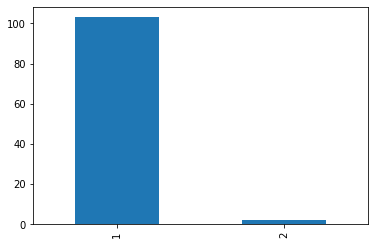

In [200]:
# Young Adults mit Familienstand 2 hat wie viele unterhaltsberechtigten Personen?

df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)]['pers'].value_counts().plot(kind='bar')

In [29]:
df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)]['kredit'].value_counts()

1    58
0    47
Name: kredit, dtype: int64

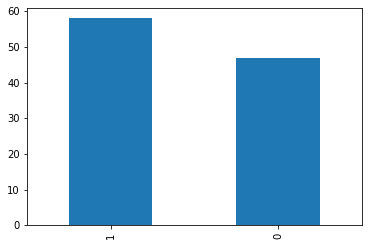

In [28]:
df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)]['kredit'].value_counts().plot(kind='bar')

In [202]:
# df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)][['kredit','laufzeit']]

In [203]:
df[(df['altersgruppe'] == 'Young Adults') & (df['famges'] == 2)][['kredit','laufzeit']].describe()

,kredit,laufzeit
count,105.000000,105.000000
mean,0.552381,19.561905
std,0.499634,11.097404
min,0.000000,4.000000
25%,0.000000,12.000000
50%,1.000000,18.000000
75%,1.000000,24.000000
max,1.000000,60.000000


#### + Viele junge Erwachsene, die Unterhaltsberechtigte von mehr als 2 Personen haben, nehmen einen Kredit auf, um Gebrauchtwagen zu kaufen

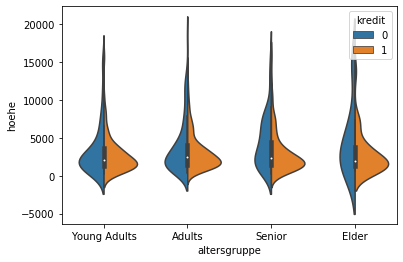

In [204]:
sns.violinplot(x='altersgruppe',y='hoehe',data=df,hue='kredit',split=True)

#### By Laufkonto

kein Kontostand bzw. Debetsaldo -> 2	
0 <= ... < 200 DM -> 3	
... >= 200 DM oder Gehaltskonto seit mind. 1 Jahr -> 4	
kein lfd. Konto -> 1


#### Sparkont (Sparkonto oder Wertpapiere)
< 100,- DM .........................................2

100,- <= ... < 500,- DM .......................3

500,- <= ... < 1000,- DM .....................4

.>= 1000,- DM ....................................5

.nicht ermittelbar / kein Sparkonto .....1

In [205]:
df['laufkont'].value_counts()

4    394
1    274
2    269
3     63
Name: laufkont, dtype: int64

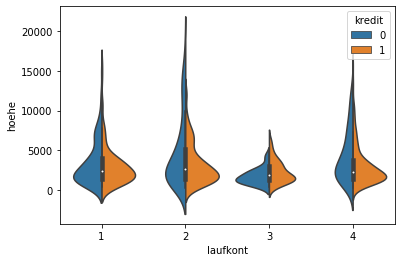

In [206]:
sns.violinplot(x='laufkont',y='hoehe',data=df,hue='kredit',split=True)

In [207]:
df.groupby(['laufkont', 'kredit'])['hoehe'].count()

laufkont  kredit
1         0         135
          1         139
2         0         105
          1         164
3         0          14
          1          49
4         0          46
          1         348
Name: hoehe, dtype: int64

<Figure size 1200x800 with 0 Axes>

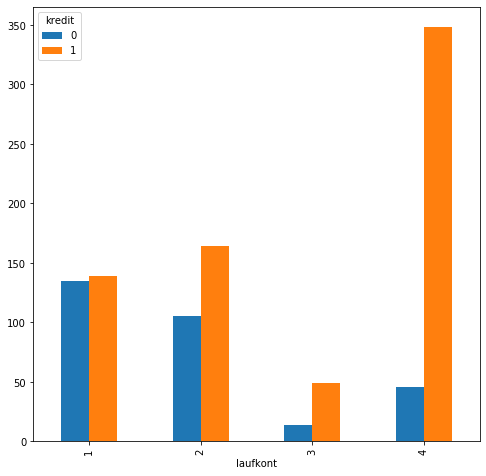

In [208]:
# laufkont vs credit

laufk_kredit_gr = df.groupby(['laufkont','kredit'])['hoehe'].count().unstack()
plt.figure(dpi=200)
laufk_kredit_gr.plot.bar(figsize=(8,8))
plt.show()

#### + Wie wir sehen können, befindet sich die größte Anzahl der Beobachtungsdaten in der Kategorie der 'laufkont' der Kategorie 4 (>= 200 DM oder Gehaltskonto seit mind. 1 Jahr), mit Kredit Ratios von 1 und 0 fast 7 Mal gröser.

#### + während für Kategorie 1 das Verhältnis von Kredit 1 und 0 fast gleich ist.

#### ? untersuchen wir die Kategorie 1 von 'laufkont' und 'beruf'

In [209]:
# laufkont  vs beruf


df.groupby(['laufkont', 'beruf'])['hoehe'].count()

laufkont  beruf
1         1          6
          2         59
          3        172
          4         37
2         1          9
          2         57
          3        155
          4         48
3         1          4
          2         14
          3         37
          4          8
4         1          3
          2         70
          3        266
          4         55
Name: hoehe, dtype: int64

<Figure size 1200x800 with 0 Axes>

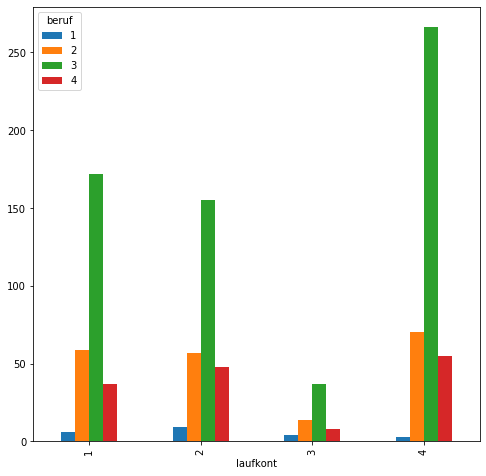

In [210]:
laufk_beruf_gr = df.groupby(['laufkont','beruf'])['hoehe'].count().unstack()
plt.figure(dpi=200)
laufk_beruf_gr.plot.bar(figsize=(8,8))
plt.show()

#### + Menschen, die kein Konto laufende haben, sind die meisten Menschen, die als Kategorie 3 (Facharbeiter / gelernte Angestellte / Beamte) arbeiten, während bei laufende Konto Kategorie 4 (>= 200 DM oder Gehaltskonto seit mind. 1 Jahr) von dem Job Kategorie 3 dominiert wird.

#### ? In 'laufkont' hat die Spalte 'beruf' die höchste Anzahl von Personen in Kategorie 3, sehen wir uns die Verteilung der Kredite 1 und 0 an

In [211]:
# laufkont 1 vs beruf

df[(df['laufkont'] == 1) & (df['beruf'] == 1)]['kredit'].value_counts()


0    4
1    2
Name: kredit, dtype: int64

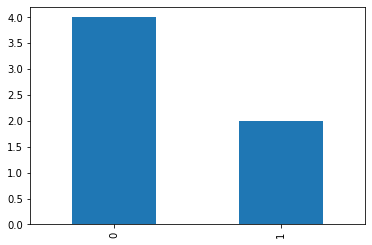

In [212]:
df[(df['laufkont'] == 1) & (df['beruf'] == 1)]['kredit'].value_counts().plot(kind='bar')

In [213]:
df.groupby(['laufkont','beruf','kredit'])['hoehe'].count()

laufkont  beruf  kredit
1         1      0           4
                 1           2
          2      0          23
                 1          36
          3      0          96
                 1          76
          4      0          12
                 1          25
2         1      0           2
                 1           7
          2      0          19
                 1          38
          3      0          57
                 1          98
          4      0          27
                 1          21
3         1      0           1
                 1           3
          2      0           5
                 1           9
          3      0           6
                 1          31
          4      0           2
                 1           6
4         1      1           3
          2      0           9
                 1          61
          3      0          27
                 1         239
          4      0          10
                 1          45
Name: hoehe, dt

<Figure size 1200x800 with 0 Axes>

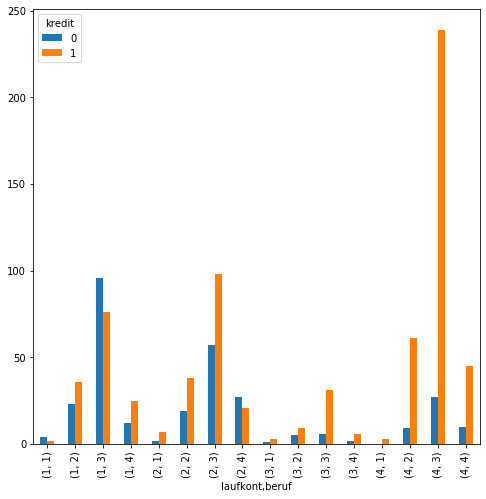

In [214]:
# laufkont vs credit

laufk_kredit_ber = df.groupby(['laufkont','beruf','kredit'])['hoehe'].count().unstack()
plt.figure(dpi=200)
laufk_kredit_ber.plot.bar(figsize=(8,8))
plt.show()

#### ? Da die Ausfälle in der Laufkont-Kategorie 1 hoch waren, lassen Sie uns untersuchen

In [215]:
# laufkont 1 vs beruf 3

df[(df['laufkont'] == 1) & (df['beruf'] == 3)]['kredit'].value_counts()

0    96
1    76
Name: kredit, dtype: int64

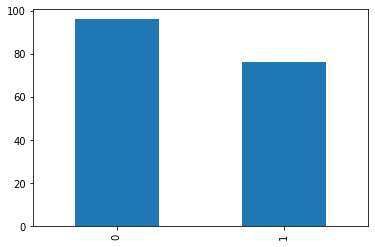

In [216]:

df[(df['laufkont'] == 1) & (df['beruf'] == 3)]['kredit'].value_counts().plot(kind='bar')

#### + es stellt sich heraus, dass die Zahl der Menschen mit Laufkonto Kategorie 2 mit Beruf Kategorie 3, die keinen Kredit bezahlen können, größer ist als die Zahl der Menschen, die auf Kredit bezahlen können.

In [217]:
# laufkont 1 vs beruf 2
df[(df['laufkont'] == 1) & (df['beruf'] == 2)]['kredit'].value_counts()

1    36
0    23
Name: kredit, dtype: int64

In [218]:
# laufkont 1 vs beruf 4
df[(df['laufkont'] == 1) & (df['beruf'] == 4)]['kredit'].value_counts()

1    25
0    12
Name: kredit, dtype: int64

In [219]:
# laufkont 1 vs beruf 1
df[(df['laufkont'] == 1) & (df['beruf'] == 1)]['kredit'].value_counts()

0    4
1    2
Name: kredit, dtype: int64

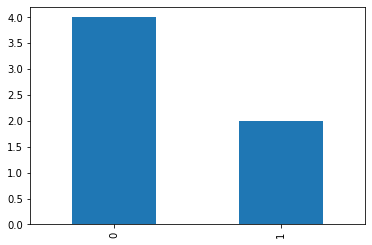

In [220]:
df[(df['laufkont'] == 1) & (df['beruf'] == 1)]['kredit'].value_counts().plot(kind='bar')

#### + Neben kein lfd. Konto-Menschen, die als Kategorie 3 (Facharbeiter / gelernte Angestellte / Beamte) arbeiten, gibt es auch Menschen, die keine Arbeit haben, um sich einen Kredit zu leihen, und die ihre Schulden nicht zurückzahlen können.

In [221]:
####################################################################

In [222]:
df['sparkont'].value_counts()

1    603
5    183
2    103
3     63
4     48
Name: sparkont, dtype: int64

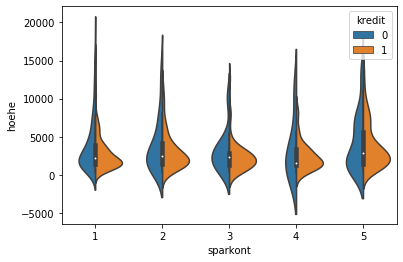

In [223]:
sns.violinplot(x='sparkont',y='hoehe',data=df,hue='kredit',split=True)

In [224]:
df.groupby(['sparkont', 'kredit'])['kredit'].count()

sparkont  kredit
1         0         217
          1         386
2         0          34
          1          69
3         0          11
          1          52
4         0           6
          1          42
5         0          32
          1         151
Name: kredit, dtype: int64

<Figure size 1200x800 with 0 Axes>

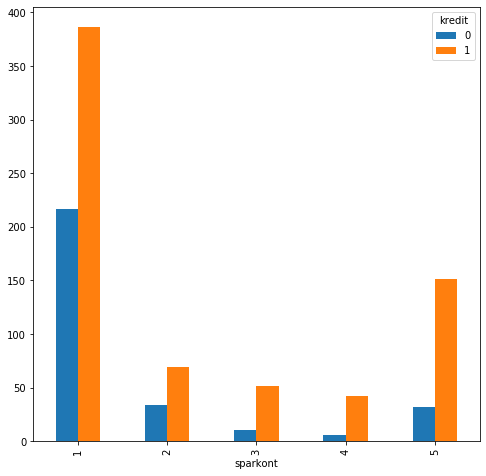

In [225]:
spark_kredit_gr = df.groupby(['sparkont','kredit'])['kredit'].count().unstack()
plt.figure(dpi=200)
spark_kredit_gr.plot.bar(figsize=(8,8))
plt.show()